In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
data_dic = pd.read_csv("./Telecom Churn Data Dictionary.csv", encoding=' ISO8859')
data_dic

,S.No.,Variable Name,Meaning
0,1,CustomerID,The unique ID of each customer
1,2,Gender,The gender of a person
2,3,SeniorCitizen,Whether a customer can be classified as a senior citizen.
3,4,Partner,If a customer is married/ in a live-in relationship.
4,5,Dependents,If a customer has dependents (children/ retired parents)
5,6,Tenure,The time for which a customer has been using the service.
6,7,PhoneService,Whether a customer has a landline phone service along with the internet service.
7,8,MultipleLines,Whether a customer has multiple lines of internet connectivity.
8,9,InternetService,The type of internet services chosen by the customer.
9,10,OnlineSecurity,Specifies if a customer has online security.


In [2]:
churn = pd.read_csv("./churn_data.csv")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [12]:
customer = pd.read_csv("./customer_data.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
internet = pd.read_csv("./internet_data.csv")
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [16]:
cust_internet_df = customer.merge(internet, how='inner', on='customerID')
cust_internet_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [17]:
telecom_churn = cust_internet_df.merge(churn, how='inner', on='customerID')
telecom_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
telecom_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

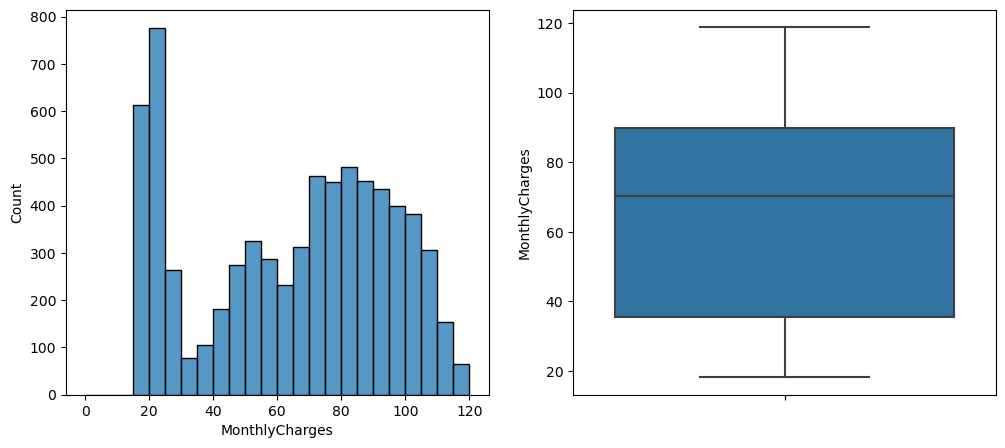

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
_bins= [item for item in np.arange(0, 125, 5)]
sns.histplot(x='MonthlyCharges',  data=telecom_churn, bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='MonthlyCharges', data=telecom_churn)
plt.show()

In [43]:
telecom_churn['TotalCharges'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,TotalCharges
5306,999.9,1
5456,999.8,1
1359,999.45,1
2791,998.1,1
2478,997.75,1
...,...,...
5944,100.4,1
3911,100.35,1
1534,100.25,1
4415,100.2,1


In [49]:
telecom_churn['MonthlyCharges'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,MonthlyCharges
1258,118.75,1
1444,118.65,1
1000,118.60,2
1229,118.35,1
1317,118.20,1
...,...,...
1241,18.75,1
1104,18.70,2
1311,18.55,1
1387,18.40,1


In [39]:
telecom_churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [38]:
telecom_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [37]:
telecom_churn['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [65]:
telecom_churn['tenure'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,tenure
1,72,362
5,71,170
9,70,119
20,69,95
15,68,100
...,...,...
4,4,176
3,3,200
2,2,238
0,1,613


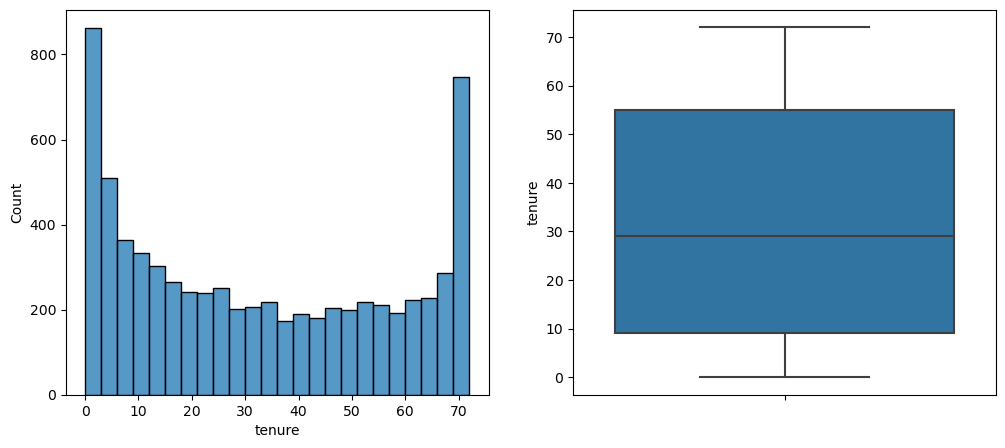

In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
_bins= [item for item in np.arange(0, 75, 3)]
sns.histplot(x='tenure',  data=telecom_churn, bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='tenure', data=telecom_churn)
plt.show()

In [86]:
# convert churn column in binary
is_churn_column_converted_into_binary = telecom_churn['Churn'].isin([1]).any(axis=0)
print(is_churn_column_converted_into_binary)

True


In [95]:
is_churn_column_converted_into_binary_2 = 1 in telecom_churn['Churn']
print(is_churn_column_converted_into_binary_2)

True


In [87]:
if not is_churn_column_converted_into_binary:
    telecom_churn['Churn'] = telecom_churn['Churn'].str.lower().map({'yes': 1, 'no': 0 })
else:
    print("churn_column_has_been_converted_into_binary")

churn_column_has_been_converted_into_binary


In [85]:
telecom_churn['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

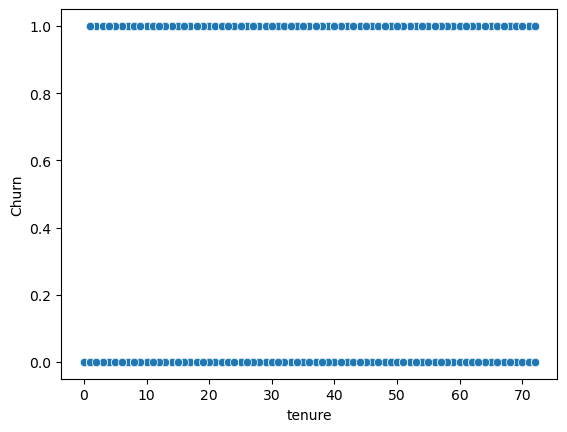

In [96]:
sns.scatterplot(x='tenure', y='Churn', data=telecom_churn)
plt.show()

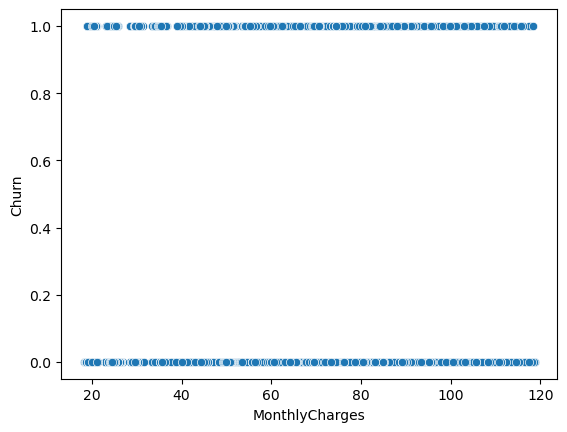

In [97]:
sns.scatterplot(x='MonthlyCharges', y='Churn', data=telecom_churn)
plt.show()

In [88]:
print(is_churn_column_converted_into_binary)

True


In [32]:
telecom_churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [34]:
telecom_churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [35]:
telecom_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [30]:
telecom_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [28]:
telecom_churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [26]:
telecom_churn['Partner'].value_counts().reset_index()

,index,Partner
0,No,3641
1,Yes,3402


In [127]:
internet.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [130]:
internet['InternetService'].value_counts().reset_index()

,index,InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [131]:
internet.loc[internet['InternetService'].str.lower().isin(['fiber optic'])]

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Yes,Fiber optic,No,Yes,No,No,Yes,No
8,7892-POOKP,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
12,8091-TTVAX,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...
7034,0639-TSIQW,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No
7035,8456-QDAVC,No,Fiber optic,No,No,No,No,Yes,No
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [108]:
internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [27]:
telecom_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

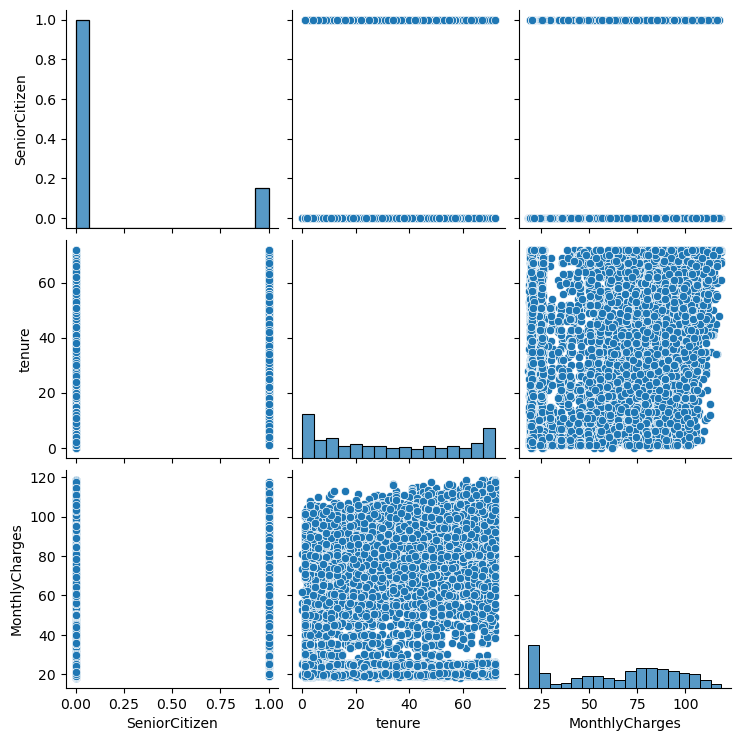

In [60]:
sns.pairplot(telecom_churn)
plt.show()

<AxesSubplot:>

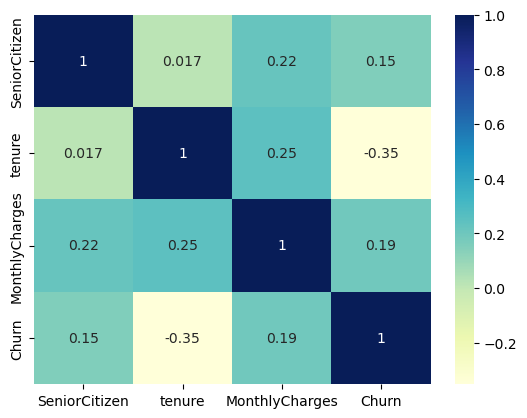

In [100]:
sns.heatmap(telecom_churn.corr(), annot=True, cmap='YlGnBu')

In [132]:
telecom_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [133]:
telecom_churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [138]:
ml = pd.get_dummies(telecom_churn['MultipleLines'], prefix='MultipleLines' )

In [142]:
ml.head(2)

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0


In [146]:
ml.drop('MultipleLines_No phone service', axis=1, inplace=True)
ml.head(2)

,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0


In [153]:
os = pd.get_dummies(telecom_churn[['OnlineBackup']])
os.head()

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [154]:
telecom_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [174]:
telecom_churn[telecom_churn['TotalCharges'].isin([' '])]

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No phone service,DSL,Yes,No,Yes,...,Yes,No,0,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,...,Yes,No,0,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,DSL,No,Yes,Yes,...,Yes,No,0,Yes,Two year,No,Mailed check,73.35,,0


In [177]:
telecom_churn['TotalCharges'] = pd.to_numeric(telecom_churn['TotalCharges'], errors='coerce')
telecom_churn['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [178]:
telecom = telecom_churn

In [179]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [202]:
telecom.iloc[:, 16: ].head(1)

,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,Electronic check,29.85,29.85,0


In [204]:
telecom['PaymentMethod'].value_counts().reset_index()

,index,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [231]:
# convert yes/no to binary values

bin_vars = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

telecom[bin_vars] = telecom[bin_vars].applymap(lambda x: 1 if x.lower() == 'yes' else 0)
telecom[bin_vars].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,0,0,0
4,0,0,1,1


In [241]:
telecom.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,No,No,34,1,One year,0,Mailed check,56.95,1889.50,0


In [244]:
ignore_columns = ['customerID', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn'] + bin_vars
telecom.loc[:, ~telecom.columns.isin(ignore_columns)].head(1)

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaymentMethod
0,Female,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Electronic check


In [261]:
telecom['PaymentMethod'].value_counts().reset_index()

,index,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


#####  For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [257]:
cat_vars_with_multiple_levels = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

dummy1 = pd.get_dummies(telecom[cat_vars_with_multiple_levels], drop_first=True)
dummy1.head()

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0


In [262]:
cat_vars_with_multiple_levels_df = telecom[cat_vars_with_multiple_levels]
cat_vars_with_multiple_levels_df.head()

,gender,InternetService,Contract,PaymentMethod
0,Female,DSL,Month-to-month,Electronic check
1,Male,DSL,One year,Mailed check
2,Male,DSL,Month-to-month,Mailed check
3,Male,DSL,One year,Bank transfer (automatic)
4,Female,Fiber optic,Month-to-month,Electronic check


In [263]:
telecom = pd.concat([telecom, dummy1], axis=1)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,29.85,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,1889.50,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,...,108.15,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,...,1840.75,0,1,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,...,151.65,1,0,1,0,0,0,0,1,0


##### Creating dummy variables for the remaining categorical variables and dropping the level with big namesa and not useful name.

In [282]:
telecom['OnlineBackup'].value_counts().reset_index()

,index,OnlineBackup
0,No,3088
1,Yes,2429
2,No internet service,1526


In [288]:
#convert multi values categorical columns using one-hot encoding (dummpy variables)
cat_vars_having_3_values = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                            'StreamingMovies']

# Creating dummy variables for the variable 'MultipleLines' and dropping MultipleLines_No phone service column
if ('MultipleLines_Yes' not in telecom.columns):
    dummy_ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines').drop('MultipleLines_No phone service', axis=1)
    telecom = pd.concat([telecom, dummy_ml], axis=1)
else:
    print("Already created dummy variables for column MultipleLines")
    

# Creating dummy variables for the variable 'OnlineSecurity'
if ('OnlineSecurity_Yes' not in telecom.columns):
    dummy_os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity').drop('OnlineSecurity_No internet service', axis=1)
    telecom = pd.concat([telecom, dummy_os], axis=1)
else:
    print("Already created dummy variables for column OnlineSecurity")
    
# Creating dummy variables for the variable 'OnlineBackup'
if ('OnlineBackup_Yes' not in telecom.columns):
    dummy_ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup').drop('OnlineBackup_No internet service', axis=1)
    telecom = pd.concat([telecom, dummy_ob], axis=1)
else:
    print("Already created dummy variables for column OnlineBackup")
    
    
# Creating dummy variables for the variable 'DeviceProtection'
if ('DeviceProtection_Yes' not in telecom.columns):
    dummy_dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection').drop('DeviceProtection_No internet service', axis=1)
    telecom = pd.concat([telecom, dummy_dp], axis=1)
else:
    print("Already created dummy variables for column DeviceProtection")   
    

# Creating dummy variables for the variable 'TechSupport'
if ('TechSupport_Yes' not in telecom.columns):
    dummy_tp = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport').drop('TechSupport_No internet service', axis=1)
    telecom = pd.concat([telecom, dummy_tp], axis=1)
else:
    print("Already created dummy variables for column TechSupport")
    
# Creating dummy variables for the variable 'StreamingTV'
if ('StreamingTV_Yes' not in telecom.columns):
    dummy_st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV').drop('StreamingTV_No internet service', axis=1)
    telecom = pd.concat([telecom, dummy_st], axis=1)
else:
    print("Already created dummy variables for column StreamingTV")   
    

# Creating dummy variables for the variable 'StreamingMovies'
if ('StreamingMovies_Yes' not in telecom.columns):
    dummy_sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies').drop('StreamingMovies_No internet service', axis=1)
    telecom = pd.concat([telecom, dummy_sm], axis=1)
else:
    print("Already created dummy variables for column StreamingMovies")
    

telecom.iloc[:, :].head(2)

Already created dummy variables for column MultipleLines
Already created dummy variables for column OnlineSecurity
Already created dummy variables for column OnlineBackup
Already created dummy variables for column DeviceProtection
Already created dummy variables for column TechSupport
Already created dummy variables for column StreamingTV
Already created dummy variables for column StreamingMovies


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,0,1,1,0,1,0,1,0,1,0


In [295]:
telecom.iloc[:, 20:28].head(2)

,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0


In [303]:
if 'gender_Male' in telecom.columns:
    print('yes')

yes


#####   Dropping the repeated variables

In [302]:
if 'gender' in telecom:
    cat_vars = cat_vars_with_multiple_levels + cat_vars_having_3_values
    telecom = telecom.drop(labels=cat_vars, axis=1)
else:
    print("Columns {0} already dropped.".format(cat_vars))
    
    
telecom.head(2)

Columns ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] already dropped


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,1,0,1,0,1,0,1,0


In [307]:
telecom.iloc[: 4, :17]

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,1,0,0,0


In [308]:
telecom.iloc[: 4, 17:]

,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1
3,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [304]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   uint8  
 11  Inte

#### Checking for Missing Values and Inputing Them

In [309]:
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
DeviceProtection_No             

In [314]:
telecom_where_total_charge_is_blank = telecom[ telecom['TotalCharges'].isin([np.nan])]
telecom_where_total_charge_is_blank

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
488,4472-LVYGI,0,1,1,0,0,1,52.55,NaN,0,...,0,1,0,1,0,1,1,0,1,0
753,3115-CZMZD,0,0,1,0,1,0,20.25,NaN,0,...,0,0,0,0,0,0,0,0,0,0
936,5709-LVOEQ,0,1,1,0,1,0,80.85,NaN,0,...,0,1,1,0,0,1,0,1,0,1
1082,4367-NUYAO,0,1,1,0,1,0,25.75,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1340,1371-DWPAZ,0,1,1,0,0,0,56.05,NaN,0,...,0,1,0,1,0,1,1,0,0,1
3331,7644-OMVMY,0,1,1,0,1,0,19.85,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3826,3213-VVOLG,0,1,1,0,1,0,25.35,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4380,2520-SGTTA,0,1,1,0,1,0,20.00,NaN,0,...,0,0,0,0,0,0,0,0,0,0
5218,2923-ARZLG,0,1,1,0,1,1,19.70,NaN,0,...,0,0,0,0,0,0,0,0,0,0
6670,4075-WKNIU,0,1,1,0,1,0,73.35,NaN,0,...,0,1,0,1,0,1,1,0,0,1


In [324]:
np.isnan(telecom['TotalCharges'])

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

#### Removing NaN TotalCharges rows

In [328]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]
telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,1,1,0,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [329]:
telecom.shape

(7032, 32)

###  Checking for Outliers

In [334]:
# Checking for outliers in the continuous variables
telecom_con_vars = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
telecom_con_vars.describe()

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
max,72.000000,118.750000,1.000000,8684.800000


In [335]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
telecom_con_vars.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

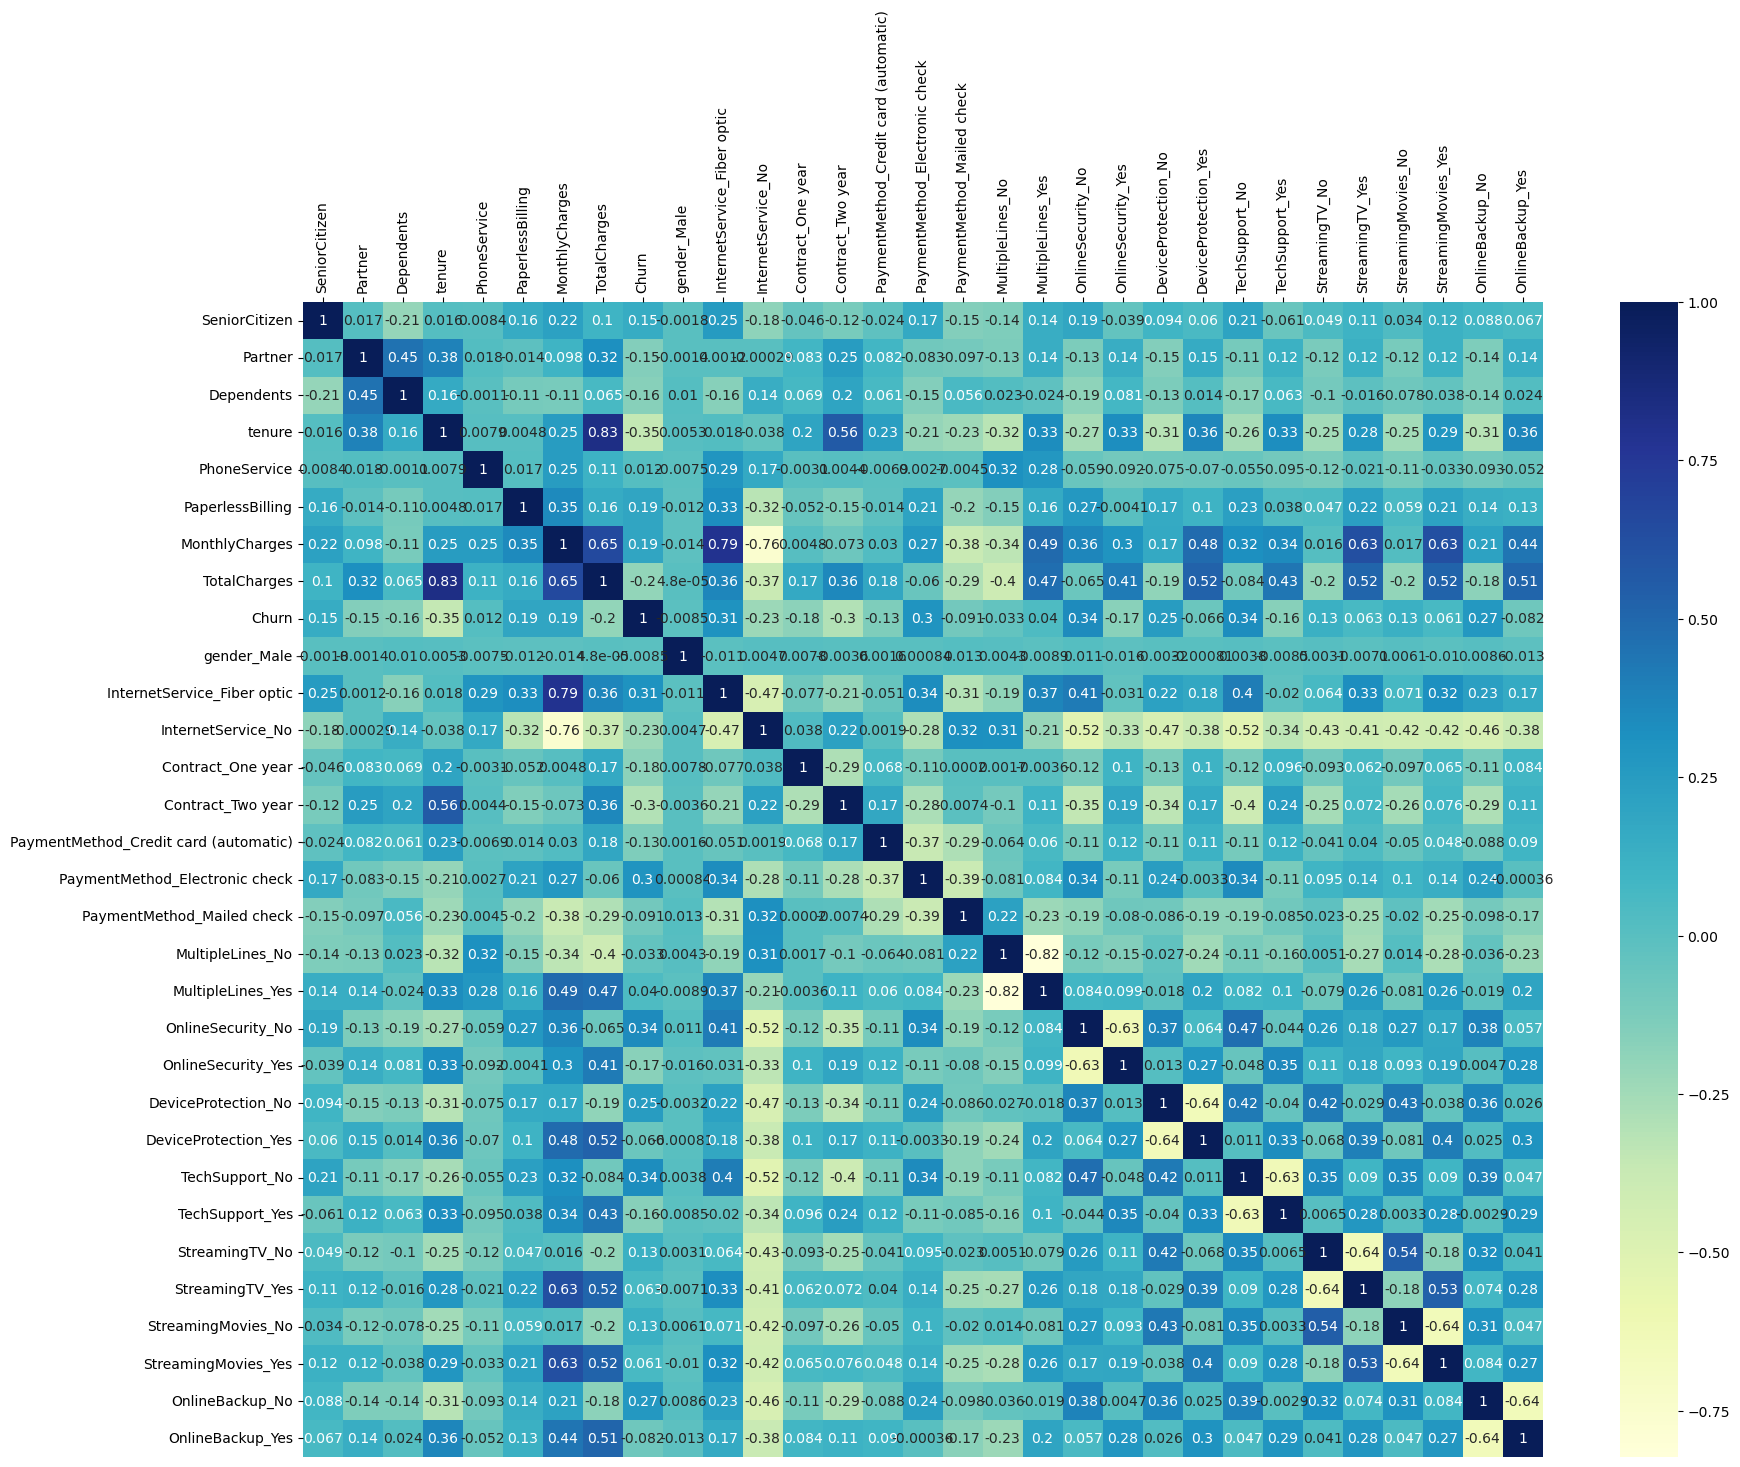

In [352]:
plt.figure(figsize=(20, 15))
ax = sns.heatmap(telecom.corr(), annot=True, cmap='YlGnBu')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

#### Step 4: Test-Train Split

In [342]:
# Putting feature variable to X
X = telecom.drop(['Churn', 'customerID'], axis=1)

# Putting response variable to y
y = telecom['Churn']

In [343]:
X.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,0,1,1,0,1,0,1,0,1,0


In [344]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100, shuffle=True)

#####  Step 5: Feature Scaling

In [393]:
X_train.iloc[:5, 16:]

,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineBackup_No,OnlineBackup_Yes
879,0,1,1,0,1,0,1,0,1,0,1,0,0,1
5790,0,0,1,0,1,0,1,0,0,1,0,1,0,1
6498,1,0,1,0,0,1,1,0,1,0,1,0,0,1
880,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,1,0,1,0,0,1,0,1,0,1,0,1,1,0


In [394]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7032, 30)
(4922, 30)
(2110, 30)
(4922,)
(2110,)


In [395]:
from sklearn.preprocessing import StandardScaler

In [396]:
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [397]:
scaler = StandardScaler()
# (x-mean)/variance
X_train[num_vars] = scaler.fit_transform(X_train[num_vars]) 
X_train[num_vars].head()

,tenure,MonthlyCharges,TotalCharges
879,0.019693,-0.338074,-0.276449
5790,0.305384,-0.464443,-0.112702
6498,-1.286319,0.581425,-0.974430
880,-0.919003,1.505913,-0.550676
2784,-1.163880,1.106854,-0.835971


In [398]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

### Step 6: Looking at Correlations

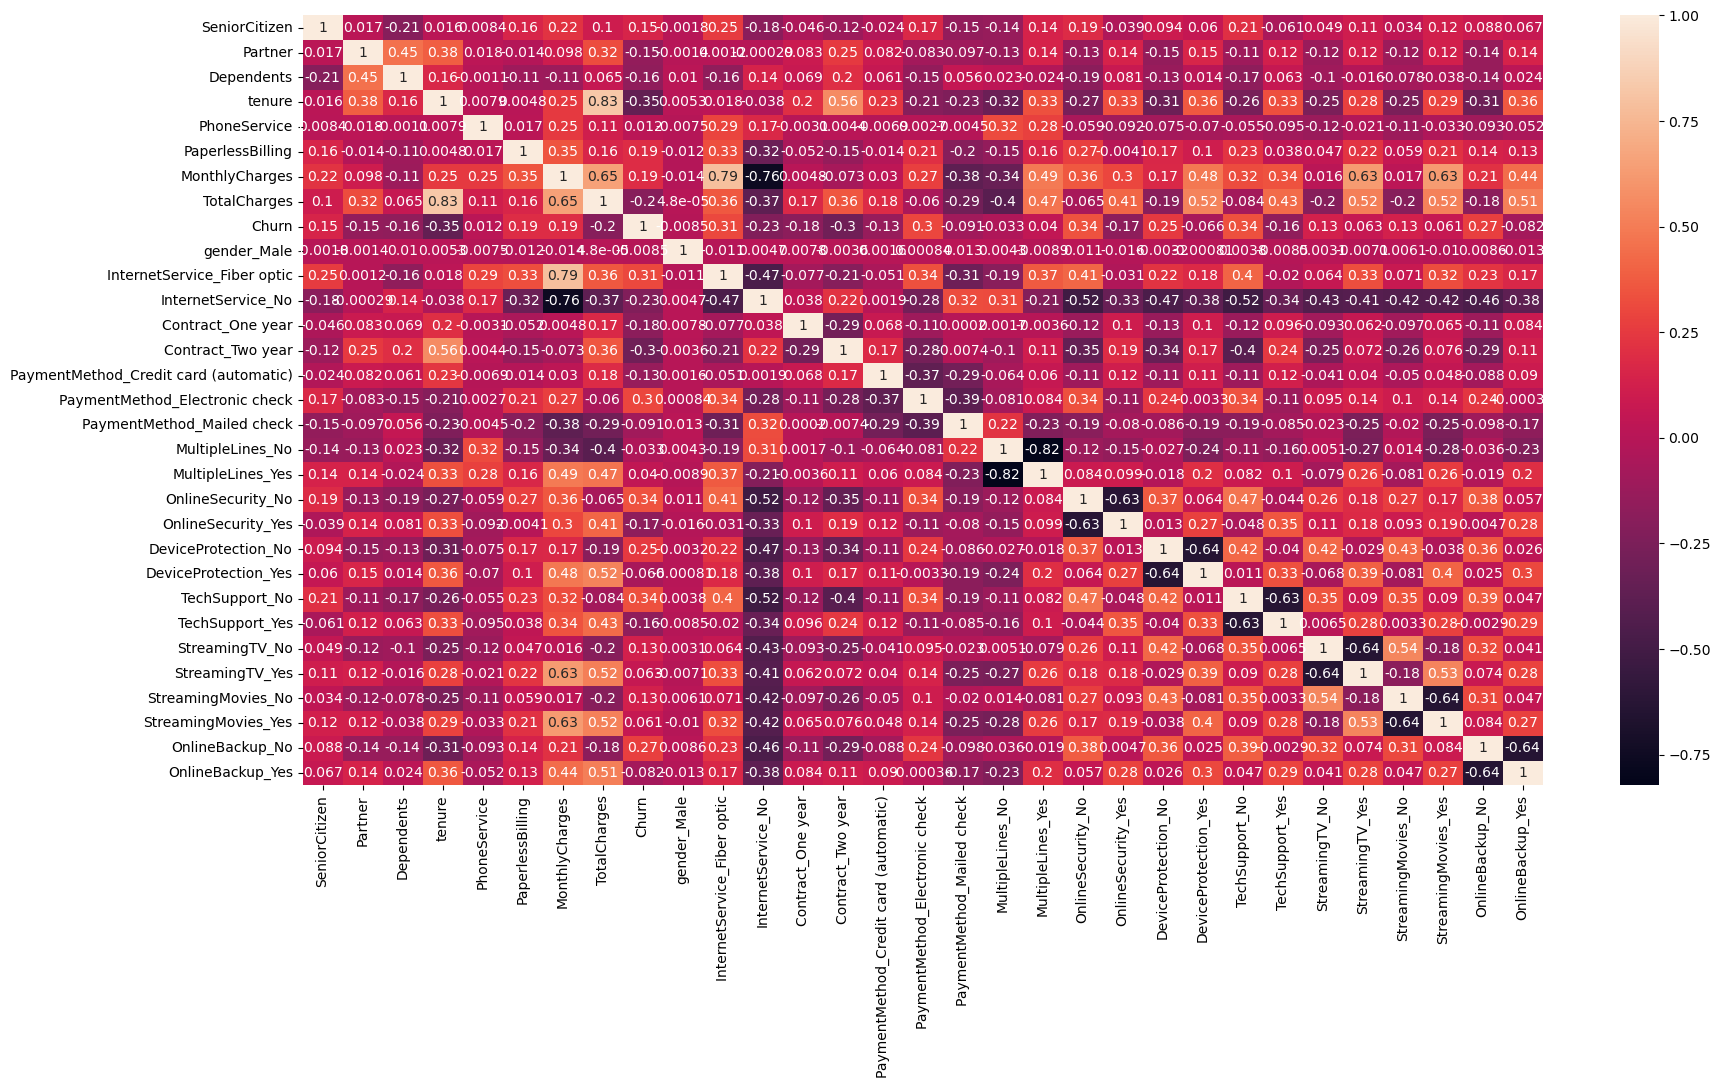

In [399]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [400]:
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)

C:\Users\window 10\AppData\Local\Temp\ipykernel_13496\4253149026.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
C:\Users\window 10\AppData\Local\Temp\ipykernel_13496\4253149026.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',


#### Again Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

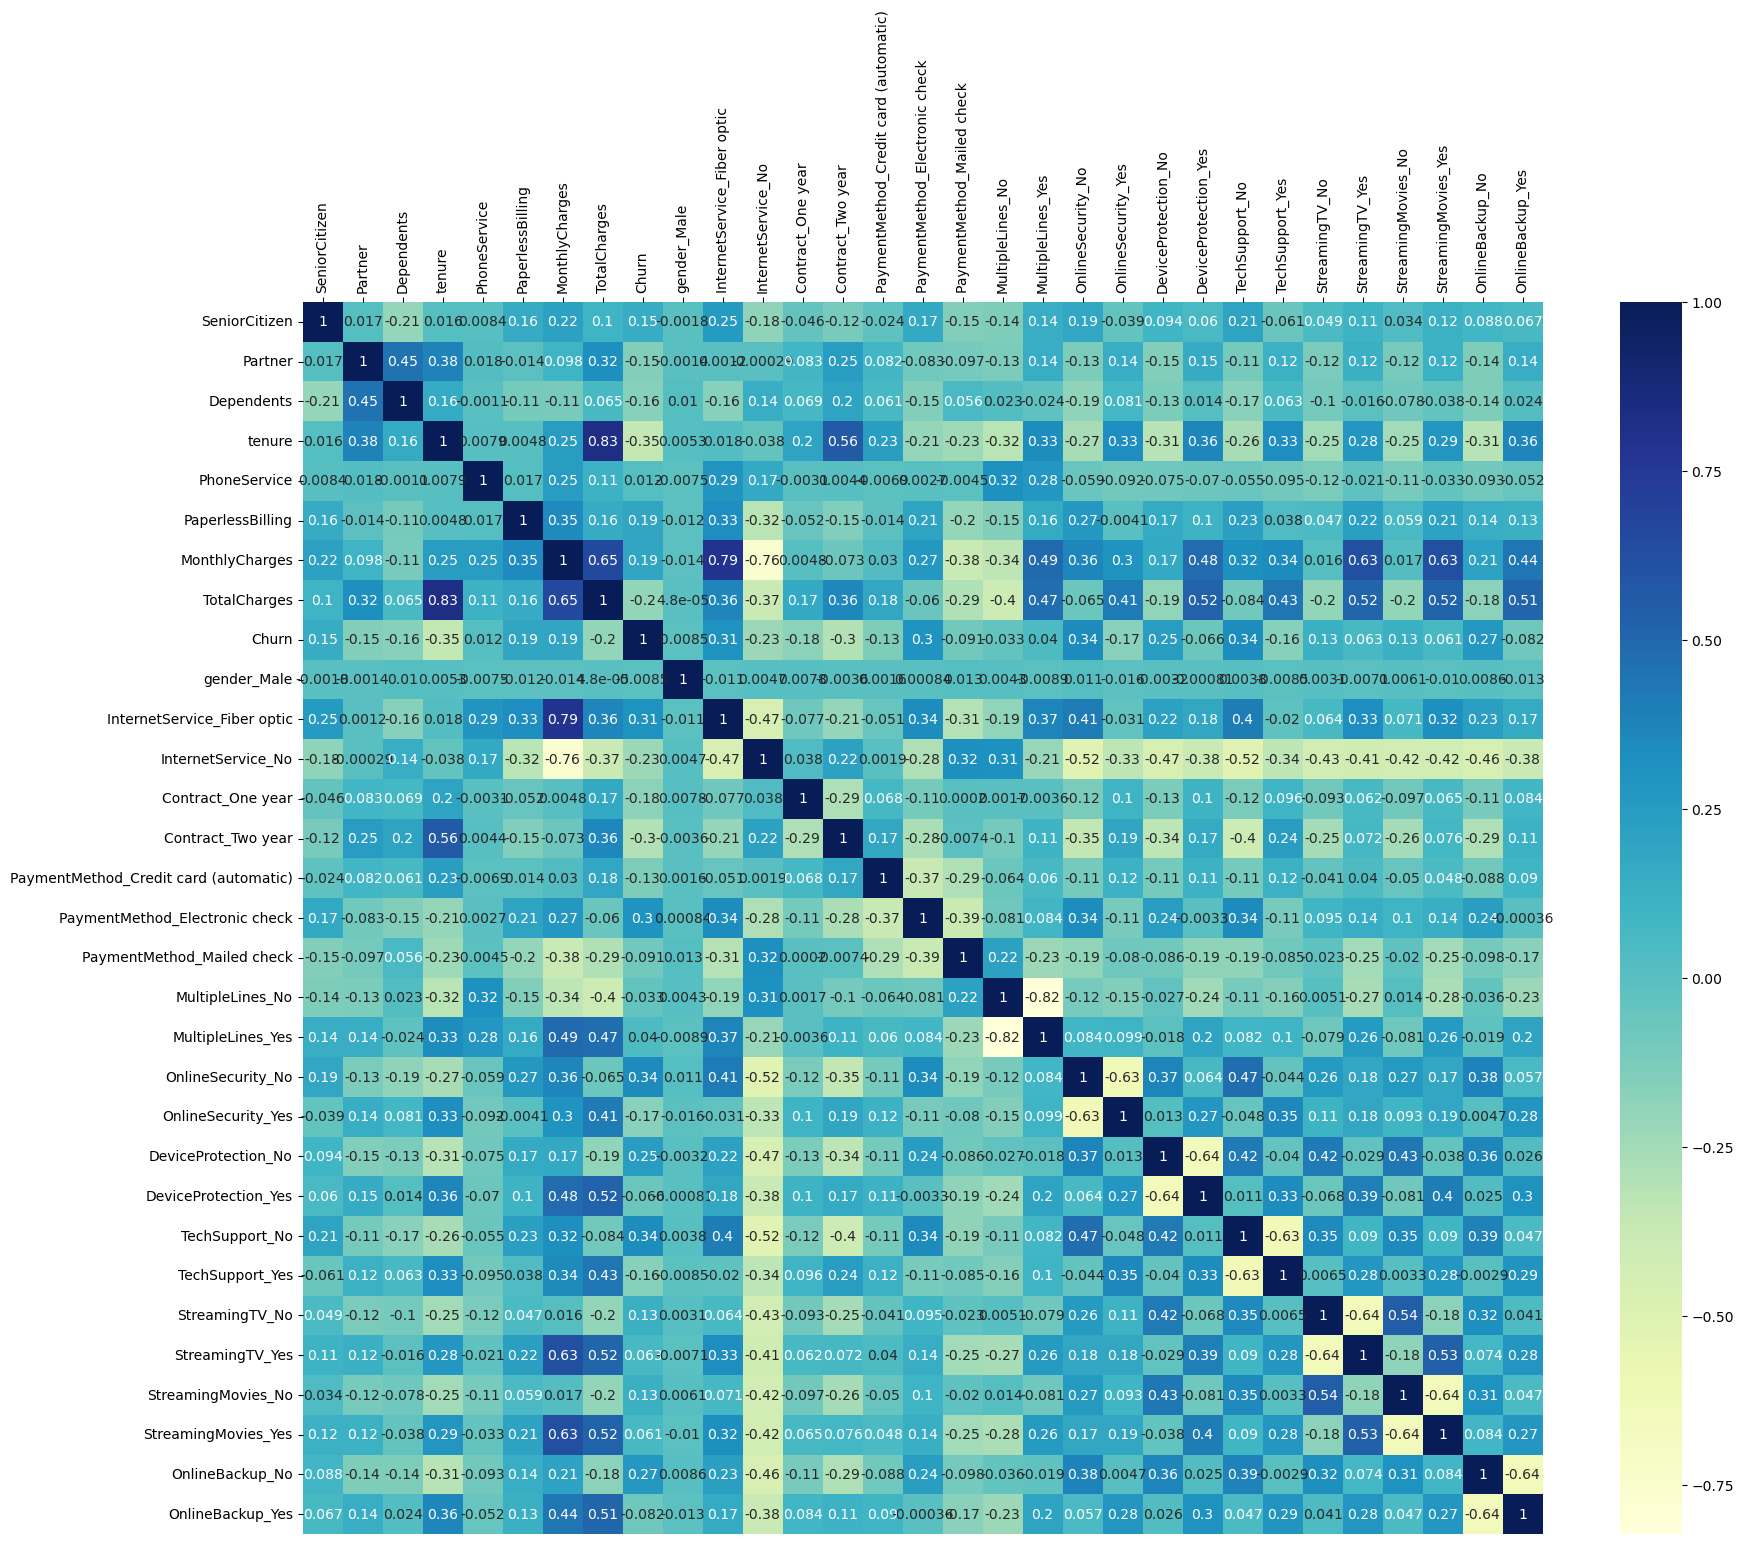

In [403]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,16))        # Size of the figure
ax=sns.heatmap(telecom.corr(), annot = True, cmap='YlGnBu')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

### Step 7: Model Building

#### Running Your First Training Model

In [404]:
import statsmodels.api as sm

In [405]:
X_train_sm = sm.add_constant(X_train)
sm_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

In [406]:
print(sm_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 24 Jun 2023   Deviance:                       4009.4
Time:                        21:25:11   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Step 8: Feature Selection Using RFE

In [413]:
from sklearn.linear_model import LogisticRegression

In [414]:
logReg = LogisticRegression()

In [415]:
from sklearn.feature_selection import RFE

In [417]:
rfe = RFE(logReg, n_features_to_select=15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [418]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True, False])

In [422]:
sum(rfe.support_)

15

In [419]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('OnlineBackup_Yes', False, 5)]

In [424]:
type( X_train.columns)

pandas.core.indexes.base.Index

In [425]:
top_15_cols = X_train.columns[rfe.support_]
top_15_cols

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [421]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'gender_Male',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'DeviceProtection_Yes', 'OnlineBackup_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [426]:
X_train_sm = sm.add_constant(X_train[top_15_cols])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

In [427]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sat, 24 Jun 2023   Deviance:                       4022.2
Time:                        21:49:24   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [429]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm)
train_res = y_train - y_train_pred

In [430]:
train_res.head()

879    -0.192642
5790   -0.275624
6498    0.400493
880     0.486429
2784    0.351767
dtype: float64

In [431]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [433]:
y_train_pred_df = pd.DataFrame({'Churn': y_train, 'Churn_Pred': y_train_pred})
y_train_pred_df.head(30)

,Churn,Churn_Pred
879,0,0.192642
5790,0,0.275624
6498,1,0.599507
880,1,0.513571
2784,1,0.648233
3874,0,0.414846
5387,0,0.431184
6623,1,0.801788
4465,0,0.228194
5364,1,0.504575


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [434]:
y_train_pred_df['predicted'] = y_train_pred_df['Churn_Pred'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Churn,Churn_Pred,predicted
879,0,0.192642,0
5790,0,0.275624,0
6498,1,0.599507,1
880,1,0.513571,1
2784,1,0.648233,1


In [435]:
from sklearn import metrics

In [437]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['predicted'])
print(confusion_matrix)

[[3275  360]
 [ 574  713]]


In [438]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [439]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_df['Churn'], y_train_pred_df['predicted']))

0.8102397399431126


#### Manually removing the features
##### Checking VIFs

In [442]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [455]:
X_train[top_15_cols].columns

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [472]:
vif = pd.DataFrame()
vif['Features'] = X_train[top_15_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[top_15_cols], i)  for i in range(X_train[top_15_cols].shape[1])]
vif['VIF']  = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,MonthlyCharges,14.85
4,TotalCharges,10.42
1,tenure,7.38
5,InternetService_Fiber optic,5.61
6,InternetService_No,5.27
8,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
2,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


In [475]:
cols = top_15_cols

In [477]:
if 'MonthlyCharges' in cols:
    cols = cols.drop('MonthlyCharges')
    
cols

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [479]:
logm3 = sm.GLM(y_train, sm.add_constant(X_train[cols]), family=sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sun, 25 Jun 2023   Deviance:                       4046.2
Time:                        17:46:38   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [480]:
y_train_pred = logm3.predict(sm.add_constant(X_train[cols]))
y_train_pred.iloc[:10]

879     0.227902
5790    0.228644
6498    0.674892
880     0.615868
2784    0.662260
3874    0.418199
5387    0.288133
6623    0.795137
4465    0.174332
5364    0.519088
dtype: float64

In [483]:
y_train_pred_df['Churn_Prob'] = y_train_pred
if 'Churn_Pred' in y_train_pred_df.columns:
    y_train_pred_df = y_train_pred_df.drop('Churn_Pred', axis=1)
y_train_pred_df.head()

,Churn,predicted,Churn_Prob
879,0,0,0.227902
5790,0,0,0.228644
6498,1,1,0.674892
880,1,1,0.615868
2784,1,1,0.662260


In [484]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df['predicted'] = y_train_pred_df['Churn_Prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df

,Churn,predicted,Churn_Prob
879,0,0,0.227902
5790,0,0,0.228644
6498,1,1,0.674892
880,1,1,0.615868
2784,1,1,0.662260
...,...,...,...
79,0,0,0.017493
3934,0,0,0.094122
5964,0,0,0.057996
6947,0,0,0.110657


In [486]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['predicted'])
print(confusion_matrix)

[[3269  366]
 [ 590  697]]


In [487]:
metrics.accuracy_score(y_train_pred_df['Churn'], y_train_pred_df['predicted'])

0.8057700121901666

So overall the accuracy hasn't dropped much

##### Let's check the VIFs again

In [489]:
len(X_train[cols].columns)

14

In [493]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,TotalCharges,7.46
1,tenure,6.90
7,Contract_Two year,3.07
4,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
2,PaperlessBilling,2.55
5,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [494]:
# Let's drop TotalCharges since it has a high VIF
cols = cols.drop('TotalCharges')
cols

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [495]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sun, 25 Jun 2023   Deviance:                       4051.9
Time:                        18:10:09   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

####  Make predication and calcalate accuaray after removing 'TotalCharges' column

In [496]:
y_train_pred = logm4.predict(X_train_sm)
y_train_pred[:10]

879     0.245817
5790    0.265361
6498    0.669410
880     0.630970
2784    0.682916
3874    0.399526
5387    0.275828
6623    0.798168
4465    0.198786
5364    0.529119
dtype: float64

In [497]:
y_train_pred_df['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df['predicted'] = y_train_pred_df['Churn_Prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df

,Churn,predicted,Churn_Prob
879,0,0,0.245817
5790,0,0,0.265361
6498,1,1,0.669410
880,1,1,0.630970
2784,1,1,0.682916
...,...,...,...
79,0,0,0.024976
3934,0,0,0.095470
5964,0,0,0.063184
6947,0,0,0.100672


In [498]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['predicted'])
print(confusion_matrix)

[[3278  357]
 [ 597  690]]


In [499]:
metrics.accuracy_score(y_train_pred_df['Churn'], y_train_pred_df['predicted'])

0.8061763510767981

#### Let's check the VIFs again

In [500]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,Contract_Two year,2.98
3,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
2,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
1,tenure,2.04
4,InternetService_No,2.03
10,TechSupport_Yes,1.92
5,Contract_One year,1.78


All variables have a good value of VIF (<5). So we need not drop any more variables and we can proceed with making predictions using this model only

In [501]:
# Let's take a look at the confusion matrix again 
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['predicted'])
print(confusion_matrix)

[[3278  357]
 [ 597  690]]


In [510]:
# Actual/Predicted     not_churn    churn
        # not_churn        3278      357
        # churn            597       690  

In [502]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_df['Churn'], y_train_pred_df['predicted'])

0.8061763510767981

## Metrics beyond simply accuracy

In [506]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [507]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5361305361305362

In [509]:
# Let us calculate specificity
TN / float(TN+FP)

0.9017881705639614

In [511]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09821182943603851


In [512]:
# positive predictive value 
print (TP / float(TP+FP))

0.6590257879656161


In [513]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8459354838709677


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [523]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

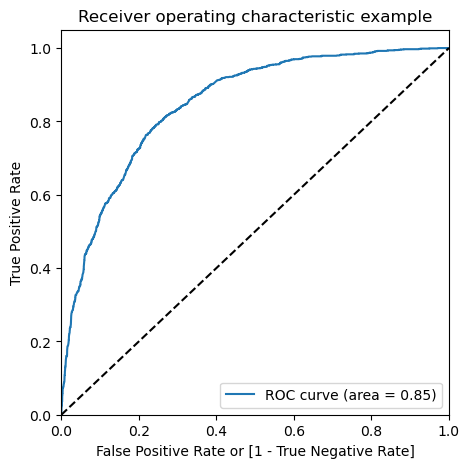

In [524]:
draw_roc( y_train_pred_df['Churn'], y_train_pred_df['Churn_Prob'])

In [518]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df['Churn'], y_train_pred_df['Churn_Prob'], drop_intermediate = True )

In [522]:
thresholds

array([1.87616664, 0.87616664, 0.87193187, ..., 0.00320386, 0.0030279 ,
       0.00291396])

In [521]:
tpr

array([0.      , 0.002331, 0.003885, ..., 1.      , 1.      , 1.      ])

In [520]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99614856, 0.99834938,
       1.        ])

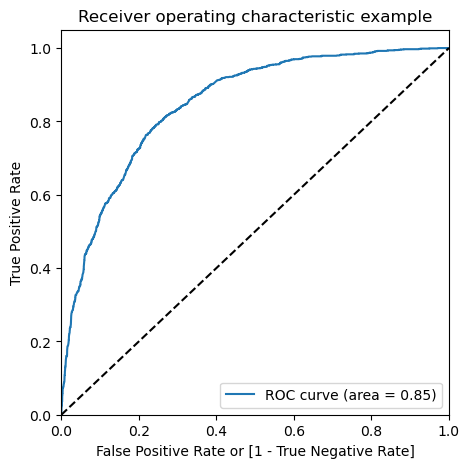

In [519]:
draw_roc( y_train_pred_df['Churn'], y_train_pred_df['Churn_Prob'])

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [540]:
cut_off_values = [float(x)/10 for x in range(10)]
cut_off_values

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [556]:
# Let's create columns with different probability cutoffs 
cut_off_values = [float(x)/10 for x in range(10)]
for cut_off_value in cut_off_values:
    y_train_pred_df['cut_off_{0}'.format(cut_off_value)]= y_train_pred_df['Churn_Prob'].map(lambda x: 1 if x > cut_off_value else 0)
y_train_pred_df.head()

,Churn,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,cut_off_0.0,cut_off_0.1,cut_off_0.2,cut_off_0.3,cut_off_0.4,cut_off_0.5,cut_off_0.6,cut_off_0.7,cut_off_0.8,cut_off_0.9
879,0,0,0.245817,1,1,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5790,0,0,0.265361,1,1,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
6498,1,1,0.669410,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
880,1,1,0.630970,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2784,1,1,0.682916,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [557]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


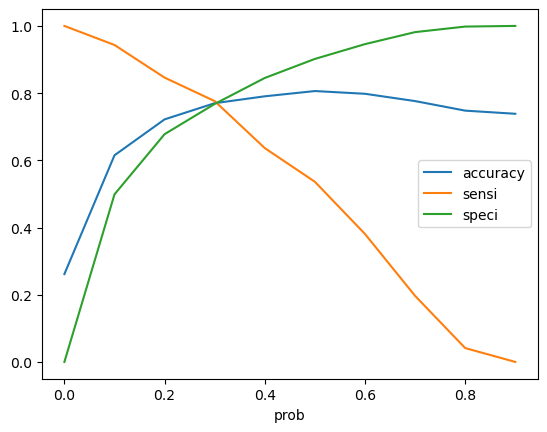

In [558]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [559]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_df.head()

,Churn,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,cut_off_0.1,cut_off_0.2,cut_off_0.3,cut_off_0.4,cut_off_0.5,cut_off_0.6,cut_off_0.7,cut_off_0.8,cut_off_0.9,final_predicted
879,0,0,0.245817,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5790,0,0,0.265361,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6498,1,1,0.669410,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1
880,1,1,0.630970,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1
2784,1,1,0.682916,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1


In [561]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_df.Churn, y_train_pred_df.final_predicted)

0.7700121901665989

In [562]:
final_confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['final_predicted'] )
final_confusion_matrix

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [563]:
TP = final_confusion_matrix[1,1] # true positive 
TN = final_confusion_matrix[0,0] # true negatives
FP = final_confusion_matrix[0,1] # false positives
FN = final_confusion_matrix[1,0] # false negatives

In [564]:
# Let's see the sensitivity of our logistic regression model
final_sensitivity = TP / float(TP+FN)
final_sensitivity

0.7762237762237763

In [565]:
# Let us calculate specificity
final_specificity = TN / float(TN+FP)
final_specificity

0.7678129298486933

In [566]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23218707015130674


In [567]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


In [568]:
y_train_pred_df.head()

,Churn,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,cut_off_0.1,cut_off_0.2,cut_off_0.3,cut_off_0.4,cut_off_0.5,cut_off_0.6,cut_off_0.7,cut_off_0.8,cut_off_0.9,final_predicted
879,0,0,0.245817,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5790,0,0,0.265361,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6498,1,1,0.669410,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1
880,1,1,0.630970,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1
2784,1,1,0.682916,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1


### Step 10: Finding Optimal Cutoff Point

In [590]:
chrun_prob_df =  y_train_pred_df.iloc[:, 0: 3]
chrun_prob_df.head()

,Churn,predicted,Churn_Prob
879,0,0,0.245817
5790,0,0,0.265361
6498,1,1,0.669410
880,1,1,0.630970
2784,1,1,0.682916


In [591]:
desired_column_order = ['Churn', 'Churn_Prob', 'predicted']
# chrun_prob_df= chrun_prob_df.reindex(columns=desired_column_order)
# chrun_prob_df = chrun_prob_df[desired_column_order]

# Swap positions of columns 'predicted' and 'Churn_Prob'
chrun_prob_df['predicted'], chrun_prob_df['Churn_Prob'] = chrun_prob_df['Churn_Prob'], chrun_prob_df['predicted']
chrun_prob_df.rename(columns ={'predicted': 'Churn_Prob' , 'Churn_Prob': 'predicted'}, inplace=True)
chrun_prob_df.head()

,Churn,Churn_Prob,predicted
879,0,0.245817,0
5790,0,0.265361,0
6498,1,0.669410,1
880,1,0.630970,1
2784,1,0.682916,1


In [592]:
cut_off_values = [ num/10 for num in np.arange(0, 10, 1)]
cut_off_values

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [593]:
if 'predicted_0.0' not in chrun_prob_df.columns:
    for cut_off_value in cut_off_values:
        chrun_prob_df['predicted_{0}'.format(cut_off_value)] = chrun_prob_df['Churn_Prob']  \
                                                                        .apply(lambda x: 1 if x > cut_off_value else 0)

chrun_prob_df.head()

,Churn,Churn_Prob,predicted,predicted_0.0,predicted_0.1,predicted_0.2,predicted_0.3,predicted_0.4,predicted_0.5,predicted_0.6,predicted_0.7,predicted_0.8,predicted_0.9
879,0,0.245817,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.265361,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.669410,1,1,1,1,1,1,1,1,0,0,0
880,1,0.630970,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.682916,1,1,1,1,1,1,1,1,0,0,0


In [595]:
fpr, tpr, theresholds = metrics.roc_curve(chrun_prob_df['Churn'], chrun_prob_df['Churn_Prob'], drop_intermediate=False)

In [598]:
print('*********fpr**********')
print(fpr)
print()
print('*********tpr**********')
print(tpr)
print()
print('*********theresholds**********')
print(theresholds)

*********fpr**********
[0.         0.         0.         ... 0.99724897 0.99834938 1.        ]

*********tpr**********
[0.       0.002331 0.003885 ... 1.       1.       1.      ]

*********theresholds**********
[1.87616664 0.87616664 0.87193187 ... 0.00314628 0.0030279  0.00291396]


#### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [606]:
cutoff_df = pd.DataFrame(columns= ['cut_off_value', 'accuracy', 'sensitivity', 'specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for cut_off_value in cut_off_values:
    confusion_matrix = metrics.confusion_matrix(chrun_prob_df['Churn'], chrun_prob_df['predicted_{0}'.format(cut_off_value)])
    total = sum(sum(confusion_matrix))
    accuracy = round((confusion_matrix[0, 0] + confusion_matrix[1, 1])/total, 2)
    
    sensitivity = round(confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0]), 2)
    specificity = round(confusion_matrix[0, 0] / (confusion_matrix[0, 0]+ confusion_matrix[0, 1]), 2)
    cutoff_df.loc[cut_off_value] =  [cut_off_value, accuracy, sensitivity, specificity]
    
cutoff_df   

,cut_off_value,accuracy,sensitivity,specificity
0.0,0.0,0.26,1.00,0.00
0.1,0.1,0.61,0.94,0.50
0.2,0.2,0.72,0.85,0.68
0.3,0.3,0.77,0.78,0.77
0.4,0.4,0.79,0.64,0.85
0.5,0.5,0.81,0.54,0.90
0.6,0.6,0.80,0.38,0.95
0.7,0.7,0.78,0.20,0.98
0.8,0.8,0.75,0.04,1.00
0.9,0.9,0.74,0.00,1.00


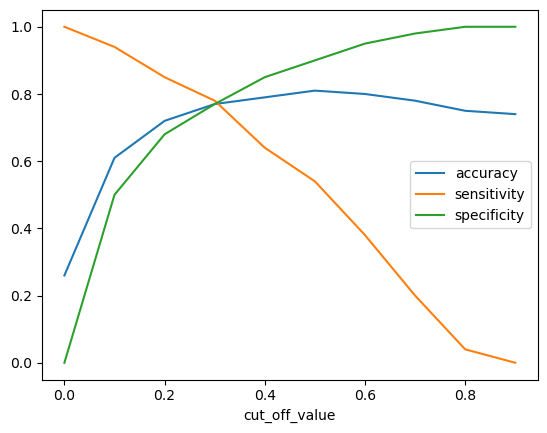

In [610]:
cutoff_df.plot.line(x='cut_off_value', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [613]:
chrun_prob_df['final_predicted'] = chrun_prob_df['Churn_Prob'].map(lambda x: 1 if x > 0.3 else 0)

chrun_prob_df.head()

,Churn,Churn_Prob,predicted,predicted_0.0,predicted_0.1,predicted_0.2,predicted_0.3,predicted_0.4,predicted_0.5,predicted_0.6,predicted_0.7,predicted_0.8,predicted_0.9,final_predicted
879,0,0.245817,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,0.265361,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.669410,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.630970,1,1,1,1,1,1,1,1,0,0,0,1
2784,1,0.682916,1,1,1,1,1,1,1,1,0,0,0,1


In [614]:
# Let's check the overall accuracy.
metrics.accuracy_score(chrun_prob_df.Churn, chrun_prob_df.final_predicted)

0.7700121901665989

In [617]:
confusion2 = metrics.confusion_matrix(chrun_prob_df.Churn, chrun_prob_df.final_predicted )
confusion2

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [618]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [619]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [620]:
# Let us calculate specificity
TN / float(TN+FP)

0.7678129298486933

In [621]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23218707015130674


In [622]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5420510037981552


In [623]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


## Precision and Recall

In [624]:
#Looking at the confusion matrix again

In [625]:
confusion = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['predicted'] )
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

In [626]:
confusion2 = metrics.confusion_matrix(y_train_pred_df['Churn'], y_train_pred_df['final_predicted'] )
confusion2

array([[2791,  844],
       [ 288,  999]], dtype=int64)

##### Precision
TP / TP + FP

In [627]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6590257879656161

##### Recall
TP / TP + FN

In [628]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5361305361305362

Using sklearn utilities for the same

In [629]:
from sklearn.metrics import precision_score, recall_score

In [631]:
?precision_score

In [632]:
precision_score(y_train_pred_df['Churn'], y_train_pred_df['final_predicted'])

0.5420510037981552

In [633]:
recall_score(y_train_pred_df['Churn'], y_train_pred_df['final_predicted'])

0.7762237762237763

In [634]:
### Precision and recall tradeoff

In [635]:
from sklearn.metrics import precision_recall_curve

In [636]:
y_train_pred_df['Churn'], y_train_pred_df['final_predicted']

(879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: Churn, Length: 4922, dtype: int64,
 879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: final_predicted, Length: 4922, dtype: int64)

In [653]:
y_train_pred_df['Churn'].shape

(4922,)

In [638]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_df['Churn'], y_train_pred_df['Churn_Prob'])

In [640]:
print(precision)
print(recall)
print(thresholds)

[0.26706786 0.26702658 0.26708204 ... 1.         1.         1.        ]
[1.       0.999223 0.999223 ... 0.003885 0.002331 0.      ]
[0.00507399 0.00513093 0.00516224 ... 0.86757417 0.87193187 0.87616664]


In [641]:
print(precision.shape)
print(recall.shape)
print(thresholds.shape)

(3482,)
(3482,)
(3481,)


In [639]:
prth_df = pd.DataFrame({'precision': precision, 'recall': recall, 'threshold': thresholds})
prth_df

ValueError: All arrays must be of the same length

In [649]:
precision.shape

(3482,)

In [657]:
precision

array([0.26706786, 0.26702658, 0.26708204, ..., 1.        , 1.        ,
       1.        ])

In [658]:
x = precision[:]
x[-4:]

array([0.88888889, 1.        , 1.        , 1.        ])

In [659]:
x = precision[:-1]
x[-4:]

array([0.9       , 0.88888889, 1.        , 1.        ])

In [650]:
precision[:-1].shape

(3481,)

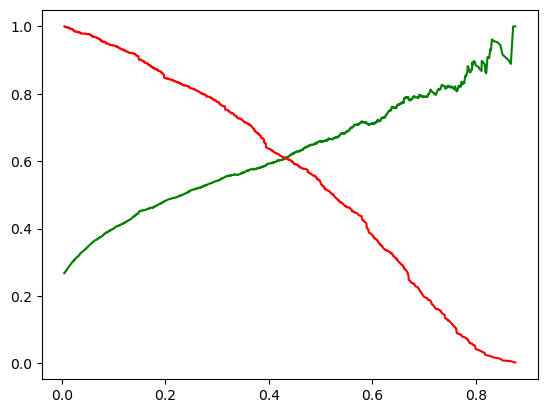

In [651]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

In [ ]:
df = pd.DataFrame()

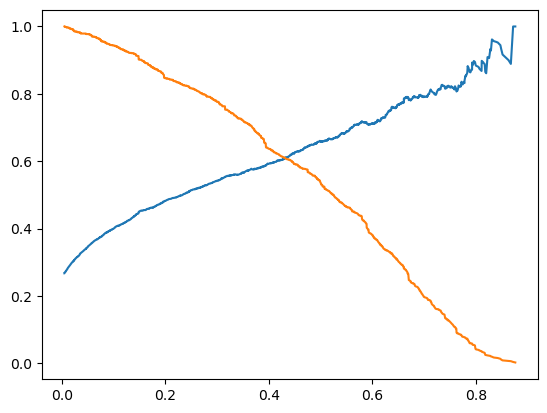

In [677]:
plt.plot(thresholds.reshape(-1), precision[:-1].reshape(-1))
plt.plot(thresholds.reshape(-1), recall[:-1].reshape(-1))
plt.show() 


### Step 11: Making predictions on the test set

In [ ]:
# X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [680]:
X_test[num_vars].head()

,tenure,MonthlyCharges,TotalCharges
942,24,79.85,2001.00
3730,57,104.50,5921.35
1761,58,24.45,1513.60
2283,1,71.55,71.55
1872,41,19.70,804.25


In [681]:
# (x-mean)/variance
X_test[num_vars] = scaler.transform(X_test[num_vars]) 
X_test[num_vars].head()

,tenure,MonthlyCharges,TotalCharges
942,-0.347623,0.499951,-0.128378
3730,0.999203,1.319685,1.600302
1761,1.040015,-1.342374,-0.343297
2283,-1.286319,0.223935,-0.979170
1872,0.346196,-1.500335,-0.656086


In [685]:
len(col)

15

In [686]:
len(cols)

13

In [687]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,OnlineBackup_Yes
942,0,0,0,-0.347623,1,1,0.499951,-0.128378,1,1,...,1,0,0,0,0,0,0,0,1,0
3730,0,1,0,0.999203,1,1,1.319685,1.600302,0,1,...,1,0,0,1,0,1,0,1,1,1
1761,0,0,0,1.040015,1,1,-1.342374,-0.343297,1,0,...,1,0,0,1,0,0,0,0,0,0
2283,0,0,0,-1.286319,1,1,0.223935,-0.979170,1,1,...,0,0,1,0,0,0,0,0,0,0
1872,0,1,1,0.346196,1,0,-1.500335,-0.656086,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0,0,0,1.244080,1,0,0.132483,0.802182,1,0,...,0,0,0,1,1,1,1,0,0,1
3508,0,0,0,1.529770,1,1,1.623968,2.490097,0,1,...,0,0,0,1,1,1,1,1,1,1
6765,0,1,1,1.488957,1,1,-1.304131,-0.272833,0,0,...,0,0,0,1,0,0,0,0,0,0
3598,1,0,0,-1.286319,1,0,-0.615753,-0.990304,1,0,...,0,1,0,0,0,0,0,0,0,0


In [688]:
X_test = X_test[cols]
X_test.head()

,SeniorCitizen,tenure,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,-0.347623,1,1,0,0,0,1,0,0,0,0,1
3730,0,0.999203,1,1,0,0,0,1,0,1,0,1,1
1761,0,1.040015,1,0,1,0,1,1,0,1,0,0,0
2283,0,-1.286319,1,1,0,0,0,0,1,0,0,0,0
1872,0,0.346196,0,0,1,0,1,0,0,0,0,0,0


In [690]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm4.predict(X_test_sm)

In [692]:
y_test_pred[:10]

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
1970    0.692893
2532    0.285289
1616    0.008994
2485    0.602307
5914    0.145153
dtype: float64

In [696]:
y_test_pred.values.reshape(-1)

array([0.4197249 , 0.26023229, 0.00864986, ..., 0.00834799, 0.50361892,
       0.00548729])

In [698]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

In [699]:
print(fpr.shape)
print(tpr.shape)
print(thresholds.shape)

(760,)
(760,)
(760,)


[]

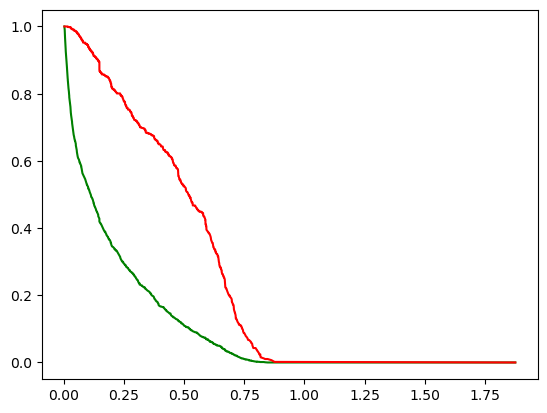

In [704]:
plt.plot(thresholds, fpr, 'g-')
plt.plot(thresholds, tpr, 'r-')
plt.plot()

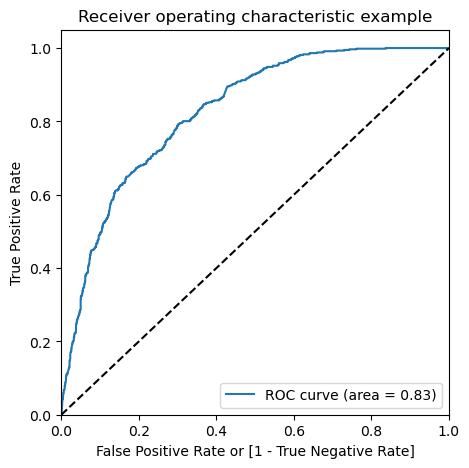

In [705]:
draw_roc(y_test, y_test_pred)

In [710]:
y_test.index

Int64Index([ 942, 3730, 1761, 2283, 1872, 1970, 2532, 1616, 2485, 5914,
            ...
            6473, 3651,  485,  201, 5605, 1289, 3508, 6765, 3598, 4987],
           dtype='int64', length=2110)

In [712]:
# Converting y_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df

,0
942,0.419725
3730,0.260232
1761,0.008650
2283,0.592626
1872,0.013989
...,...
1289,0.023041
3508,0.054121
6765,0.008348
3598,0.503619


In [714]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Churn
942,0
3730,1
1761,0
2283,1
1872,0
...,...
1289,0
3508,0
6765,0
3598,0


In [719]:
# Appending y_test_df and y_pred_1
y_test_pred_final_df = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_test_pred_final_df.head()

,Churn,0
0,0,0.419725
1,1,0.260232
2,0,0.008650
3,1,0.592626
4,0,0.013989


In [725]:
type(y_test)

pandas.core.series.Series

In [727]:
y_test.shape

(2110,)

In [729]:
y_test_pred_df2 = pd.DataFrame(columns=['CustomerId', 'Churn', 'Churn_Prob'])
y_test_pred_df2['CustomerId'] = y_test.index
y_test_pred_df2['Churn'] = y_test.values
y_test_pred_df2['Churn_Prob'] = y_test_pred.values
y_test_pred_df2

,CustomerId,Churn,Churn_Prob
0,942,0,0.419725
1,3730,1,0.260232
2,1761,0,0.008650
3,2283,1,0.592626
4,1872,0,0.013989
...,...,...,...
2105,1289,0,0.023041
2106,3508,0,0.054121
2107,6765,0,0.008348
2108,3598,0,0.503619


In [730]:
y_test_pred_df = pd.DataFrame(data={'CustId': y_test.index, 'Churn': y_test, 'Churn_Prob': y_test_pred})
y_test_pred_df

,CustId,Churn,Churn_Prob
942,942,0,0.419725
3730,3730,1,0.260232
1761,1761,0,0.008650
2283,2283,1,0.592626
1872,1872,0,0.013989
...,...,...,...
1289,1289,0,0.023041
3508,3508,0,0.054121
6765,6765,0,0.008348
3598,3598,0,0.503619


##### Predicting value based on cut_off (0.42) taken Precision recall point of view 

In [731]:
y_test_pred_df['final_predicated'] = y_test_pred_df['Churn_Prob'].map(lambda x: 1 if x > 0.42 else 0) 
y_test_pred_df.head()

,CustId,Churn,Churn_Prob,final_predicated
942,942,0,0.419725,0
3730,3730,1,0.260232,0
1761,1761,0,0.008650,0
2283,2283,1,0.592626,1
1872,1872,0,0.013989,0


In [733]:
cm_test = metrics.confusion_matrix(y_test_pred_df['Churn'], y_test_pred_df['final_predicated'])
print(cm_test)

[[1286  242]
 [ 214  368]]


In [736]:
metrics.accuracy_score(y_test_pred_df['Churn'], y_test_pred_df['final_predicated'])

0.7838862559241706

In [741]:
from sklearn.metrics import recall_score, precision_score

In [740]:
sens_or_tpr_or_recall  = recall_score(y_test_pred_df['Churn'], y_test_pred_df['final_predicated'])
sens_or_tpr_or_recall

0.6323024054982818

In [742]:
precision = precision_score(y_test_pred_df['Churn'], y_test_pred_df['final_predicated'])
precision

0.6032786885245902

In [743]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [744]:
# Let us calculate specificity
TN / float(TN+FP)

0.7678129298486933